# Caso Scouting
Usted hace parte del equipo de analítica de datos del Sunderland AFC de la segunda división inglesa. Se les ha encomendado trabajar en un proyecto sobre reclutar jugadores (scouting). Para ello, cuenta con una base de datos del videojuego FIFA que cuenta con información real de 22,080 jugadores a nivel mundial, recolectada en febrero de 2023. Esta información es confiable dado que dicha empresa cuenta con más de 6 mil scouts alrededor del mundo quienes realizan permanentes evaluaciones sobre el desempeño de los jugadores.

Su jefe le ha pedido una descripción de la base de datos, para conocer mejor cómo pueden trabajar con ella. La base de datos cuenta con una pestaña donde está el diccionario de variables. Tenga en cuenta esta información para poder entender los datos.

Principalmente, se busca que usted de respuesta a los siguientes interrogantes.

1.	¿Qué tipo de variable es cada una de las columnas? (recuerde responder según las 4 clasificaciones vistas en clase).

2.	Realice un completo análisis descriptivo de las columnas que vamos a utilizar: 
- Age
- height_cm
- position
- club_country
- overall
- club_overall
- value_millions
- pref_foot 

3.	Un miembro del cuerpo técnico asegura que los arqueros (GK) altos tienen un mejor desempeño (overall). ¿Qué puede afirmar usted a través de un análisis descriptivo? (Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y 192 cm; iii) más de 192 cm)

4.	Un analista afirma que los jugadores zurdos, tienen un mejor desempeño (overall) que los diestros. ¿Qué puede decir sobre esta afirmación a través de un análisis descriptivo? 

5.	Un scout asegura que los mejores jugadores, según el puntaje de desempeño (overall), juegan en clubes que pertenecen al grupo de “ligas top5” (Inglaterra, España, Alemania, Italia y Francia). ¿Qué puede decir sobre estas dos afirmaciones a través de un análisis descriptivo? 

6.	Otro scout asegura que la proporción de jugadores zurdos es mayor en la posición de centro campista (CM) que en la de centro campista ofensivo (CAM). ¿Qué puede decir sobre esta afirmación?

7.	Otro scout asegura que los mejores jugadores juegan en los mejores clubes del mundo ¿Es cierta esta afirmación de que existe una correlación entre el desempeño de los jugadores (overall) y el puntaje de desempeño del club al que pertenece (club_overall)?


Cargue de librerias a utilizar.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis

Cargamos nuestra base de datos

In [2]:
base_datos =  pd.read_excel('Base_taller_1.xlsx', sheet_name='FIFA23') # como el archivo consta de dos hohas, especificamos.
base_datos

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian MbappÃ© Lottin,23,France,182,161,ST,91,95,190.50,Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.00,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.00,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel AndrÃ©s Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.00,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,0.17,Right,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,0.12,Right,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,0.11,Right,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,0.11,Right,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58


Obtenemos información de la base de datos para conocer el tipo de variables que nos suministra la tabla.

In [3]:
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 22080 non-null  int64  
 1   player_name               22080 non-null  object 
 2   age                       22080 non-null  int64  
 3   country                   22080 non-null  object 
 4   height_cm                 22080 non-null  int64  
 5   weight_lbs                22080 non-null  int64  
 6   position                  22080 non-null  object 
 7   overall                   22080 non-null  int64  
 8   potential                 22080 non-null  int64  
 9   Value_millions            22080 non-null  float64
 10  pref_foot                 22080 non-null  object 
 11  weak_foot                 22080 non-null  int64  
 12  skill_moves               22080 non-null  int64  
 13  international_reputation  22080 non-null  int64  
 14  Attack

Para dar respuesta al interrogante de la pregunta numero 1, se procede a realizar una nueva tabla que se emplea 
como ayuda visual para determinar las verdaderas clasificaciones del tipo de variable de cada columna

In [6]:
tipos_variables = {'Variable':['player_id','player_name','age','country','height_cm','weight_lbs',
                               'position','overal','potential','Value_millions','pref_foot','weak_foot',
                              'skill_moves','international_reputation','Attacking_work_rate',
                              'Defensive_work_rate','body_type','club_country','club_name','club_overal'],
                  'Tipo de Variable':['Cuantitativa Discreta','Cualitativa Nominal','Cuantitativa Continua',
                                     'Cualitativa Nominal','Cuantitativa Continua','Cuantitativa Continua',
                                     'Cualitativa Nominal','Cuantitativa Discreta','Cuantitativa Discreta',
                                     'Cuantitativa Continua','Cualitativa Nominal','Cualitativa Ordinal',
                                     'Cualitativa Ordinal','Cualitativa Ordinal','Cualitativa Ordinal',
                                     'Cualitativa Ordinal','Cualitativa Nominal','Cualitativa Nominal',
                                     'Cualitativa Nominal','Cuantitativa Discreta']}

df_tipos_variables = pd.DataFrame(tipos_variables)

df_tipos_variables

,Variable,Tipo de Variable
0,player_id,Cuantitativa Discreta
1,player_name,Cualitativa Nominal
2,age,Cuantitativa Continua
3,country,Cualitativa Nominal
4,height_cm,Cuantitativa Continua
5,weight_lbs,Cuantitativa Continua
6,position,Cualitativa Nominal
7,overal,Cuantitativa Discreta
8,potential,Cuantitativa Discreta
9,Value_millions,Cuantitativa Continua


Se procede a realizar los analisis descriptivos de las columnas requeridas para dar solución al punto 2.


Para el analisis descriptivo de las variables cuantitativas emplearemos la siguiente funcion para evidenciar de una manera completa la informacón de cada columna.

In [7]:
"""
Esta función devuelve una tabla con un analisis descriptivo completo de la columna suministrada
Args:
    columnas (variable cuantitativa)
    
"""
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

Empezamos realizando un analisis descriptivo para la columna age

In [8]:
tabla_descriptivas(base_datos['age'])

,age
count,22080.000000
mean,24.894112
std,4.891117
min,16.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,44.000000
coef. variation,0.196477
skew,0.433100


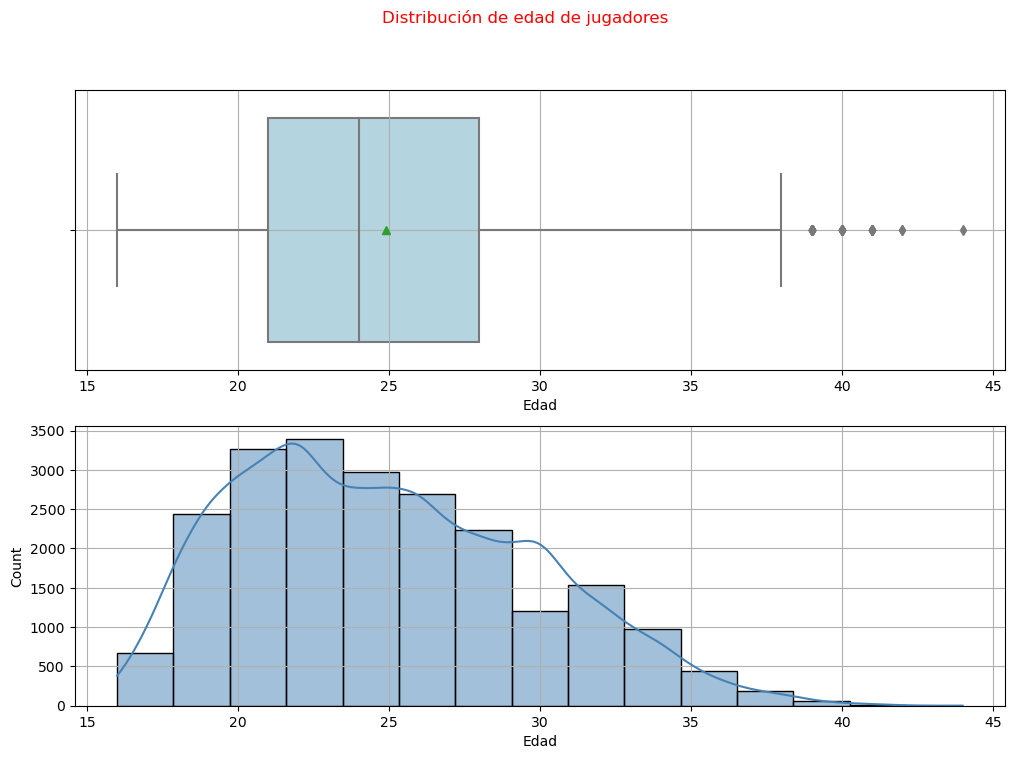

In [9]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución de edad de jugadores', color='r')

# Primer imagen
sns.boxplot(x=base_datos['age'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Edad')
axes[0].grid()
# Segunda imagen
sns.histplot(x=base_datos['age'],kde=True,color="steelblue", ax=axes[1], bins = 15)
axes[1].set_xlabel('Edad')
axes[1].grid()


plt.show()  

**Conclusión**: Analizando los datos suministrados por la tabla y apreciando las graficas, se evidencia que en el centro de distribucion, las edades de 24 años estan con el 50% de los datos agrupados, alrededor del centro de este mismo, se aprecia que la mayor cantidad de datos se agrupan entre los 21 y 28 años de edad. Los datos presentan una dispersion baja, aunque se reflejan una leve cantidad de datos atipicos. Finalmente, es posible afirmar que la distribución es asimetrica hacia la derecha.

Pa la columna height_cm, tenemos:

In [10]:
tabla_descriptivas(base_datos['height_cm'])

,height_cm
count,22080.000000
mean,181.391893
std,6.852274
min,155.000000
25%,176.000000
50%,181.000000
75%,186.000000
max,206.000000
coef. variation,0.037776
skew,-0.021493


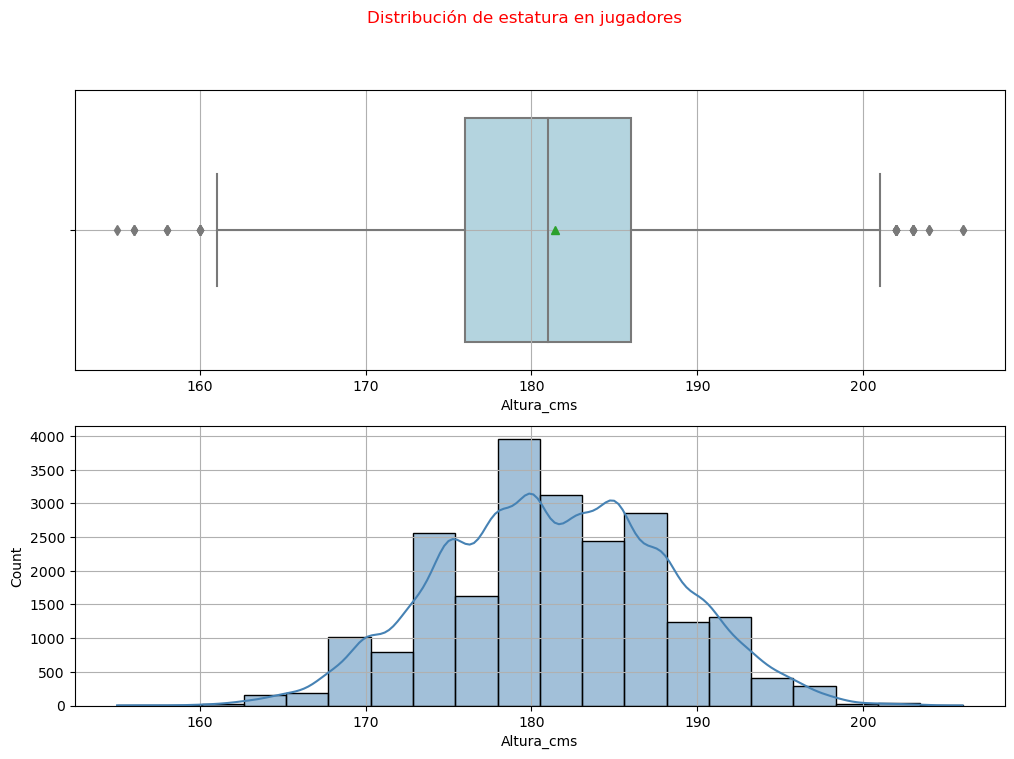

In [11]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución de estatura en jugadores', color='r')

# Primer imagen
sns.boxplot(x=base_datos['height_cm'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Altura_cms')
axes[0].grid()
# Segunda imagen
sns.histplot(x=base_datos['height_cm'],kde=True,color="steelblue", ax=axes[1], bins = 20)
axes[1].set_xlabel('Altura_cms')
axes[1].grid()


plt.show() 

**Conclusión**: A partir de los datos obtenidos, el centro de distribucion se ubica en 181 cms para el 50% de los datos, las alturas que se agrupan en relacion al centro se encuentran entre 176 cms y 186 cms. Los datos presentan una dispersion baja pero, se evidencia una cantidad de datos atipicos alta. Finalmente, es posible afirmar que la distribución es relativamente simetrica.

Para la columna 'position', la cual es una variable cualitativa nominal y teniendo en cuenta los grupos equivalentes a cada posición general, procedemos a crear una nueva columna que conserve estos datos generales.

In [12]:
# Preparamos datos, partiendo de las codificaciones de los roles en position por sus valores generales en la columna positions_g
pos_defensa = ['RWB', 'RB', 'CB', 'LB', 'LWB']
pos_medicampo = ['CDM', 'RM', 'CM', 'LM', 'CAM']
pos_delantero = ['RF', 'CF', 'LF', 'RW', 'ST', 'LW']

base_datos.loc[base_datos['position'] == 'GK', 'positions_g'] = 'Arquero'
base_datos.loc[base_datos['position'].isin(pos_defensa), 'positions_g'] = 'Defensa'
base_datos.loc[base_datos['position'].isin(pos_medicampo), 'positions_g'] = 'Mediocampista'
base_datos.loc[base_datos['position'].isin(pos_delantero), 'positions_g'] = 'Delantero'

# base_datos['position'] = base_datos['position'].replace({'GK':'Arquero'})
# base_datos['position'] = base_datos['position'].replace(['RWB', 'RB', 'CB', 'LB', 'LWB'],'Defensor')
# base_datos['position'] = base_datos['position'].replace(['CDM', 'RM', 'CM', 'LM', 'CAM'],'Mediocampista')
# base_datos['position'] = base_datos['position'].replace(['RF', 'CF', 'LF', 'RW', 'ST', 'LW'],'Delantero')
base_datos

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g
0,231747,Kylian MbappÃ© Lottin,23,France,182,161,ST,91,95,190.50,...,4,5,4,High,Low,Unique,France,Paris Saint Germain,84,Delantero
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,...,5,4,4,High,Medium,Unique,England,Manchester City,85,Mediocampista
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.00,...,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83,Delantero
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.00,...,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85,Delantero
4,158023,Lionel AndrÃ©s Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.00,...,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84,Delantero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,0.17,...,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63,Delantero
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,0.12,...,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62,Mediocampista
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,0.11,...,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58,Arquero
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,0.11,...,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58,Mediocampista


In [13]:
## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [14]:
tabla_position = tabla_freq(base_datos['positions_g'])
tabla_position

col_0,positions_g,Frec. Abs.,Frec. Rel.
0,Arquero,2430,0.110054
1,Defensa,7369,0.333741
2,Delantero,4307,0.195063
3,Mediocampista,7974,0.361141


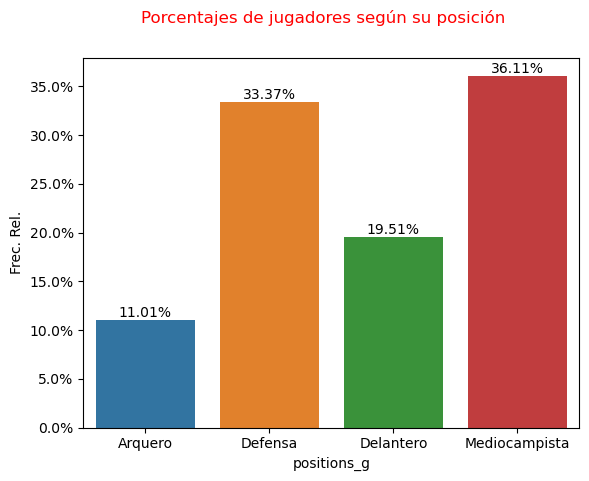

In [15]:


# Titulo general
plt.suptitle('Porcentajes de jugadores según su posición', color='r')

# datos grafico de barras
frec_aprob=sns.barplot(x=tabla_position['positions_g'],y=tabla_position["Frec. Rel."]*100)
frec_aprob.bar_label(frec_aprob.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
frec_aprob.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
# frec_aprob.set(ylim=(0, 50))

plt.show() 

**Conclusión:** En base a las graficas, lo ideal para el equipo Sunderland AFC es enfocar las reclutaciones para el fortalecimiento del medio campo y la zona defensiva, creando un tipo de juego tactico, ya que aproximadamente el 70% de los jugadores en la base de datos, se desempeñan en estas posiciones, contando con mayor variedad de elección.

Para la columna club_country la cual es del tipo cualitativo nominal, se tiene :

In [16]:
tabla_ccountry = tabla_freq(base_datos['club_country'])
tabla_ccountry

col_0,club_country,Frec. Abs.,Frec. Rel.
0,Argentina,949,0.042980
1,Australia,326,0.014764
2,Austria,366,0.016576
3,Belgium,527,0.023868
4,Bolivia,347,0.015716
5,Brazil,340,0.015399
6,Canada,98,0.004438
7,Chile,336,0.015217
8,China PR,600,0.027174
9,Colombia,350,0.015851


Nuestra variable cualitativa presenta muchas opciones y al graficar la información no se visualizaria de forma clara.
Para analizar el comportamiento de los datos agruparemos los diferentes paises de los clubs por continentes en una nueva columna separando asi en menores opciones, logrando una mejor visualización y analisis; de esta manera:

In [17]:
europa = ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'England', 'Finland',
          'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Monaco', 'Netherlands', 'Northern Ireland',
          'Norway', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Scotland', 'Spain', 'Sweden',
          'Switzerland', 'Turkey', 'Ukraine', 'Wales']

oceania = ['Australia', 'New Zealand']

africa = ['Ghana', 'Morocco', 'South Africa']

sudamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

asia = ['China PR', 'India', 'Korea Republic', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']

norteamerica = ['Canada', 'Mexico', 'United States']

sin_club = ['No club']

base_datos.loc[base_datos['club_country'].isin(sin_club), 'club_continent'] = 'Sin club'
base_datos.loc[base_datos['club_country'].isin(europa), 'club_continent'] = 'Europa'
base_datos.loc[base_datos['club_country'].isin(oceania), 'club_continent'] = 'Oceania'
base_datos.loc[base_datos['club_country'].isin(africa), 'club_continent'] = 'Africa'
base_datos.loc[base_datos['club_country'].isin(sudamerica), 'club_continent'] = 'Sur America'
base_datos.loc[base_datos['club_country'].isin(asia), 'club_continent'] = 'Asia'
base_datos.loc[base_datos['club_country'].isin(norteamerica), 'club_continent'] = 'Norte America'
base_datos

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g,club_continent
0,231747,Kylian MbappÃ© Lottin,23,France,182,161,ST,91,95,190.50,...,5,4,High,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,...,4,4,High,Medium,Unique,England,Manchester City,85,Mediocampista,Europa
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.00,...,4,5,High,Medium,Unique,Spain,Fc Barcelona,83,Delantero,Europa
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.00,...,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85,Delantero,Europa
4,158023,Lionel AndrÃ©s Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.00,...,4,5,Low,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,0.17,...,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63,Delantero,Europa
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,0.12,...,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62,Mediocampista,Asia
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,0.11,...,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58,Arquero,Asia
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,0.11,...,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58,Mediocampista,Asia


Ahora si, procedemos a realizar la tabla de frecuencia para nuestra nueva columna club_continent

In [18]:
tabla_club_continent = tabla_freq(base_datos['club_continent'])
tabla_club_continent

col_0,club_continent,Frec. Abs.,Frec. Rel.
0,Africa,111,0.005027
1,Asia,1897,0.085915
2,Europa,14787,0.669701
3,Norte America,946,0.042844
4,Oceania,363,0.016440
5,Sin club,19,0.000861
6,Sur America,3957,0.179212


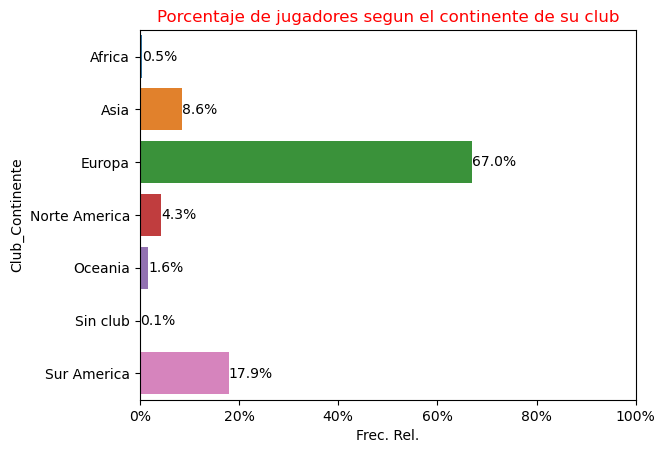

In [19]:
# Primer subgrafico
frec_club_continent=sns.barplot(y=tabla_club_continent['club_continent'],x=tabla_club_continent["Frec. Rel."]*100)
frec_club_continent.bar_label(frec_club_continent.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
frec_club_continent.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_club_continent.set(xlim=(0, 100))
frec_club_continent.set_ylabel('Club_Continente')
frec_club_continent.set_title('Porcentaje de jugadores segun el continente de su club', color = 'r')
plt.show() 

**Conclusión:** La mayor cantidad de jugadores pertenecen a clubes del continente Europeo, lo que categoriza a Europa como una potencia mundial futbolistica y refleja la alta competitividad en las ligas de este continente, resaltando ser la mejor opción para reforzar el equipo de Suderland AFC.

Para la columna overal, se procede realizar su respectivo analisis descriptivo:

In [20]:
tabla_overall = tabla_descriptivas(base_datos['overall'])
tabla_overall

,overall
count,22080.000000
mean,65.223958
std,6.804443
min,46.000000
25%,61.000000
50%,65.000000
75%,70.000000
max,91.000000
coef. variation,0.104324
skew,0.061980


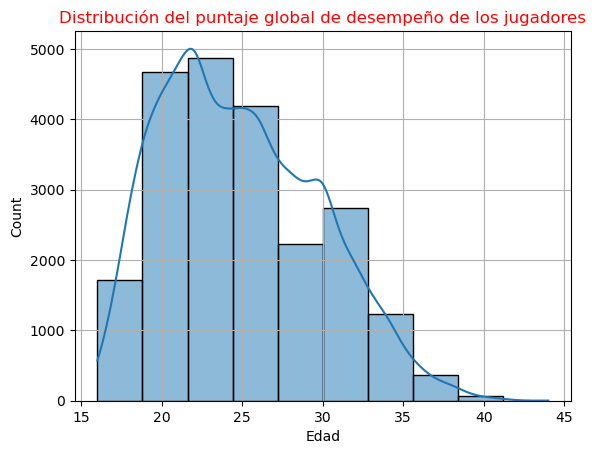

In [21]:
histplot_overall= sns.histplot(x=base_datos['age'],kde=True, bins = 10)
histplot_overall.set_title('Distribución del puntaje global de desempeño de los jugadores', color='r')
histplot_overall.set_xlabel('Edad')
histplot_overall.grid()

**Conclusión:** El centro de distribución se encuentra en 65 puntos de desempeño para el 50% de los datos. Los datos que se agrupan en relación al centro, se encuentran entre 61 y 76 puntos. Los datos presentan una dispersion leve que se evidencia por su coefeciente de curtosis positivo pero cercano a cero. Finalmente, es posible afirmar que la distribucion es sesgada hacia la derecha con una asimetria moderada.

Para la variable club_overall. Se tiene:

In [22]:
club_overall = tabla_descriptivas(base_datos['club_overall'])
club_overall

,club_overall
count,22080.000000
mean,68.295743
std,5.358555
min,0.000000
25%,65.000000
50%,68.000000
75%,71.000000
max,85.000000
coef. variation,0.078461
skew,-1.233131


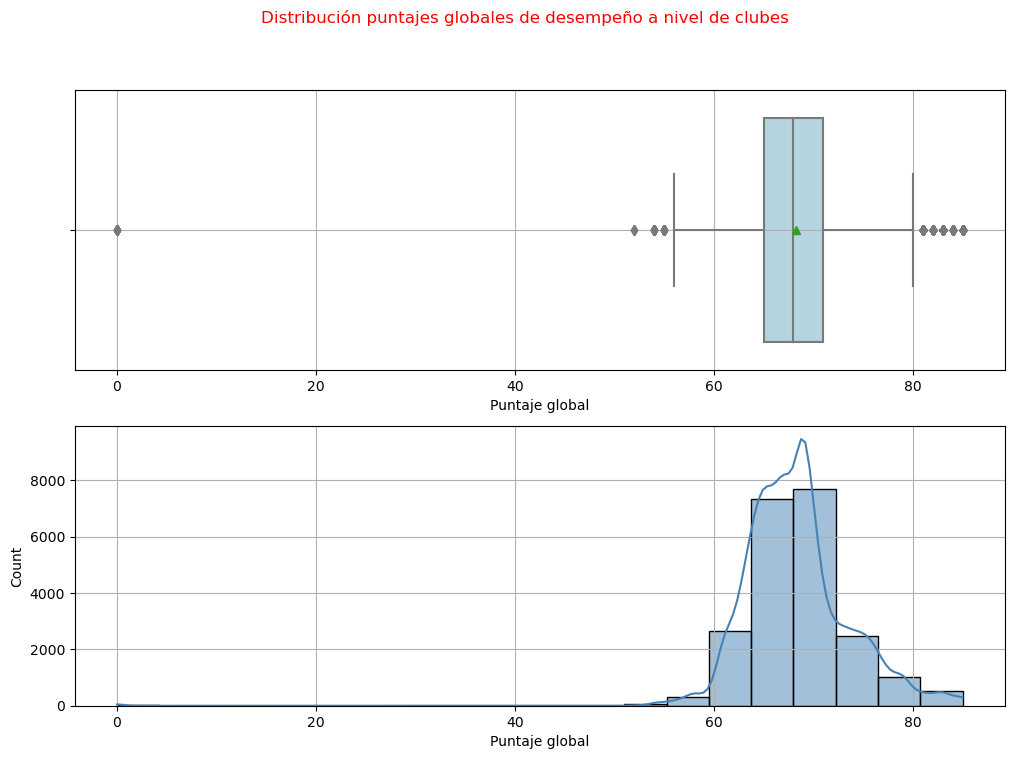

In [23]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución puntajes globales de desempeño a nivel de clubes', color='r')

# Primer imagen
boxplot_club_ov= sns.boxplot(x=base_datos['club_overall'], ax = axes[0],color="lightblue",showmeans=True) ## crea el boxplot
axes[0].set_xlabel('Puntaje global')
axes[0].grid()
# Segunda imagen
histplot_club_ov= sns.histplot(x=base_datos['club_overall'],kde=True,color="steelblue", ax=axes[1], bins = 20)
axes[1].set_xlabel('Puntaje global')
axes[1].grid()


plt.show() 

**Conclusión:** A través del análisis descriptivo que nos provee la tabla y las evidencias reflejadas en las graficas, es posible afirmar que los datos presentan una mayor concentración alrededor de la media. El centro de distribución esta en 68 puntos de desempeño global para el 50% de los datos, alrededor de este se agrupan datos entre los 65 y 71 puntos de desempeño global. Los datos presentan una incidencia notoria de valores bajos y altos reflejados en los datos atipicos visualizados en el boxplot. Finalmente, la distribución de los datos esta sesgada hacia la izquierda y la mayor concentración de los datos se encuentran en el lado derecho de la distribución.

Analisis descriptivo para columna value_millions, se tiene:

In [24]:
tabla_vm = tabla_descriptivas(base_datos['Value_millions'])
tabla_vm

,Value_millions
count,22080.000000
mean,2.501067
std,6.869693
min,0.000000
25%,0.450000
50%,0.900000
75%,1.800000
max,190.500000
coef. variation,2.746705
skew,8.449884


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


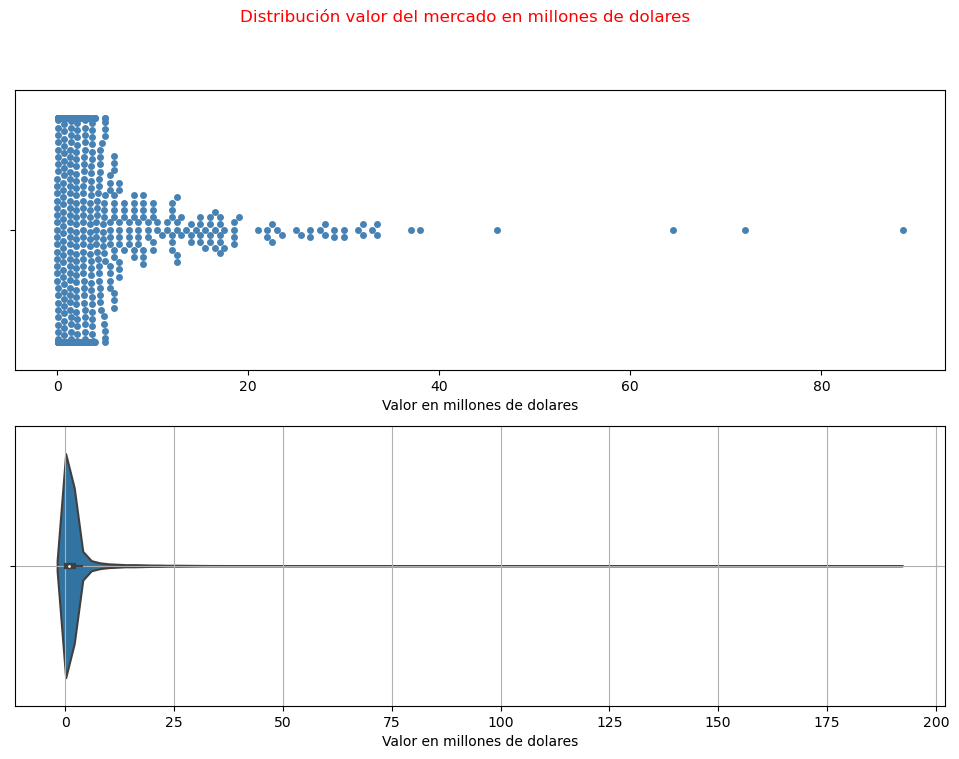

In [25]:
# Crea una figura y un conjunto de subgráficos con 2 filas y 1 columnas
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Titulo general
fig.suptitle('Distribución valor del mercado en millones de dolares', color='r')


# Debido a la gran cantidad de datos y los recursos de mi maquina, selecciono una parte aleatoria, aprox el 10%
muestras_seleccionadas = base_datos['Value_millions'].sample(n = 2008, replace = False)

# Primerimagen
swarmplot_vm= sns.swarmplot(x=muestras_seleccionadas, color='steelblue',ax=axes[0])
swarmplot_vm.set_xlabel('Valor en millones de dolares')

# segundaimagen
violinplot_vm= sns.violinplot(x=base_datos['Value_millions'], ax = axes[1],showmeans=True) ## crea el boxplot
violinplot_vm.set_xlabel('Valor en millones de dolares')
violinplot_vm.grid()


plt.show() 

**Conclusión:** El centro de la distribución está en 0.9 millones de dolares con el 50% de los datos agrupados alrededor de este, entre 0.45 y 1.8 millones de dolares. La dispersión de los datos es alta al igual que la variabilidad de los mismos. Finalmente, es posible afirmar que la distribución es asimetrica con un sesgo notorio hacia la derecha y una cola a los extremos de gran peso reflejandose en una alta cantidad de valores atipicos.

Para la columna 'pref_foot', se tiene al siguiente tabla de frecuencias:

In [26]:
tabla_pref_foot = tabla_freq(base_datos['pref_foot'])
tabla_pref_foot

col_0,pref_foot,Frec. Abs.,Frec. Rel.
0,Left,5347,0.242165
1,Right,16733,0.757835


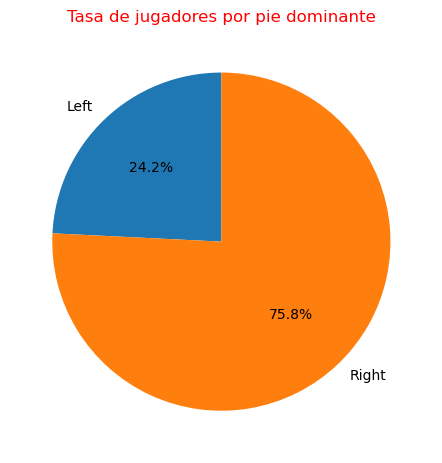

In [27]:


# grafico de torta
plt.figure(figsize=(12,8)) 
plt.subplot(1,2,2)
plt.pie(tabla_pref_foot["Frec. Rel."], labels=tabla_pref_foot["pref_foot"],autopct='%1.1f%%',startangle=90)
plt.title('Tasa de jugadores por pie dominante', color='r')
plt.show() 


plt.show()

**Conclusión:** Por cada 4 jugadores observados para reclutar, almenos 1 de ellos tiene como pierna dominante la zurda.

Para dar solución al punto 3 se debe comparar la data segun las columnas involucradas. Procedemos a preparar la data segun la nueva condición.
Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y 192 cm; iii) más de 192 cm

In [28]:
# Definir los grupos de estatura
base_datos['GruposEstatura'] = pd.cut(base_datos['height_cm'], bins=[0, 185, 192, float('inf')], labels=['Menor a 185', '185-192', 'Más de 192'])

base_datos

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g,club_continent,GruposEstatura
0,231747,Kylian MbappÃ© Lottin,23,France,182,161,ST,91,95,190.50,...,4,High,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa,Menor a 185
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,...,4,High,Medium,Unique,England,Manchester City,85,Mediocampista,Europa,Menor a 185
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.00,...,5,High,Medium,Unique,Spain,Fc Barcelona,83,Delantero,Europa,Menor a 185
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.00,...,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85,Delantero,Europa,Menor a 185
4,158023,Lionel AndrÃ©s Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.00,...,5,Low,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa,Menor a 185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,0.17,...,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63,Delantero,Europa,Menor a 185
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,0.12,...,1,Low,Medium,Lean (170-185),India,Mumbai City,62,Mediocampista,Asia,Menor a 185
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,0.11,...,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58,Arquero,Asia,Menor a 185
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,0.11,...,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58,Mediocampista,Asia,Menor a 185


In [29]:
# Filtro segun la posición requerida: 'GK'
arqueros = base_datos[base_datos['position'] == 'GK']
arqueros

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g,club_continent,GruposEstatura
6,192119,Thibaut Nicolas Marc Courtois,30,Belgium,199,212,GK,90,91,90.00,...,4,Medium,Medium,Unique,Spain,Real Madrid,85,Arquero,Europa,Más de 192
7,212831,Alisson RamsÃ©s Becker,29,Brazil,193,201,GK,89,90,79.00,...,3,Medium,Medium,Unique,England,Liverpool,84,Arquero,Europa,Más de 192
11,200389,Jan Oblak,29,Slovenia,188,192,GK,89,90,79.00,...,5,Medium,Medium,Unique,Spain,AtlÃ©tico Madrid,83,Arquero,Europa,185-192
14,167495,Manuel Peter Neuer,36,Germany,193,205,GK,89,89,11.50,...,5,Medium,Medium,Unique,Germany,Fc Bayern MÃ¼nchen,85,Arquero,Europa,Más de 192
16,230621,Gianluigi Donnarumma,23,Italy,196,198,GK,88,92,103.50,...,3,Medium,Medium,Unique,France,Paris Saint Germain,84,Arquero,Europa,Más de 192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22057,256413,Jack Lemoignan,21,Northern Ireland,186,168,GK,49,60,0.09,...,1,Medium,Medium,Lean (185+),Northern Ireland,Derry City,61,Arquero,Europa,185-192
22059,271554,Toms Leitis,18,Latvia,185,165,GK,50,65,0.09,...,1,Medium,Medium,Normal (185+),Republic of Ireland,Shamrock Rovers,63,Arquero,Europa,Menor a 185
22064,261423,Nikhil Deka,19,India,185,150,GK,48,61,0.10,...,1,Medium,Medium,Lean (185+),India,Northeast United,58,Arquero,Asia,Menor a 185
22065,271179,AndreÈ™ BrÃ®nzea,16,Romania,187,168,GK,50,69,0.10,...,1,Medium,Medium,Lean (185+),Romania,Chindia TÃ¢rgoviÅŸte,64,Arquero,Europa,185-192


In [30]:
# Información de cuantos arqueros hay en cada grupo
descrip_g = arqueros.groupby('GruposEstatura')['position'].describe()
descrip_g

,count,unique,top,freq
GruposEstatura,,,,
Menor a 185,649,1,GK,649
185-192,1264,1,GK,1264
Más de 192,517,1,GK,517


Se quiere conocer que desempeño(variable cuantitativa) presentan los arqueros de mayor estatura frente a los otros grupos


In [31]:

altura_overall = arqueros.groupby('GruposEstatura')['overall'].describe()
altura_overall

,count,mean,std,min,25%,50%,75%,max
GruposEstatura,,,,,,,,
Menor a 185,649.0,62.092450,7.253400,48.0,56.0,62.0,67.0,87.0
185-192,1264.0,64.481013,7.319944,46.0,60.0,64.0,69.0,89.0
Más de 192,517.0,64.746615,7.639378,48.0,60.0,64.0,70.0,90.0


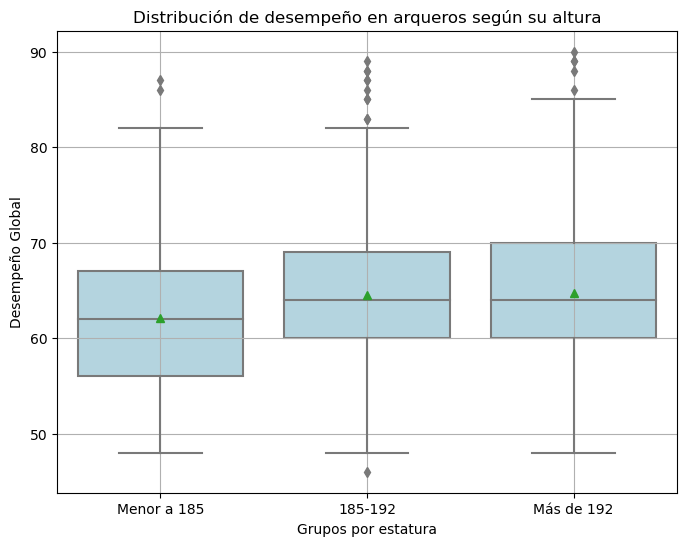

In [32]:
plt.figure(figsize=(8,6)) 
boxplot_des_alt=sns.boxplot(x=arqueros['GruposEstatura'],y=arqueros['overall'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_des_alt.set_xlabel('Grupos por estatura') ## cambia el título del eje x
boxplot_des_alt.set_ylabel('Desempeño Global') ## cambia el título del eje x
boxplot_des_alt.set_title('Distribución de desempeño en arqueros según su altura')
plt.grid()
plt.show()  

**Conclusión:** Analizando la muestra se afirma que la altura esta relacionada directamente con el desempeño(overall) de los arqueros, evidenciando los siguientes datos para sus medias: 
- Menor a 185 cm: 62.09
- entre 185 y 192 cm: 64.48
- mas de 192 cm: 64.74

Finalmente, al observar el grafico suministrado se aprecia en mejor forma la distribución y el comportamiento de los datos para corroborar con lo obtenido en a tabla descriptiva.

Procedemos a solucionar el punto 4 de los interrogantes: 

In [33]:
pref_foot_overall = base_datos.groupby('pref_foot')['overall'].describe()
pref_foot_overall

,count,mean,std,min,25%,50%,75%,max
pref_foot,,,,,,,,
Left,5347.0,65.766037,6.548680,46.0,62.0,66.0,70.0,91.0
Right,16733.0,65.050738,6.875354,46.0,61.0,65.0,69.0,91.0


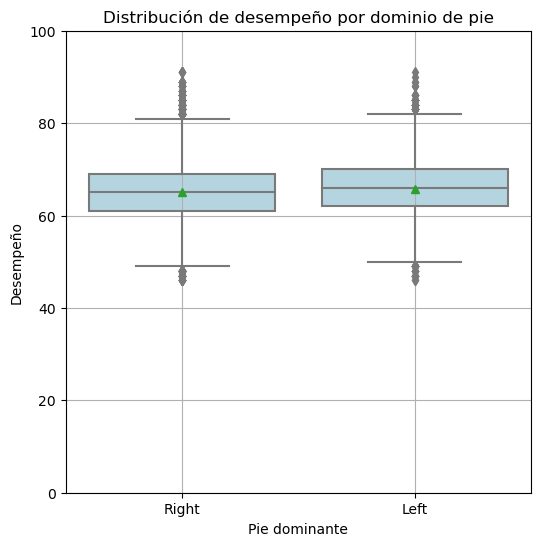

In [34]:
plt.figure(figsize=(6,6)) 
boxplot_pf_overal=sns.boxplot(x=base_datos['pref_foot'],y=base_datos['overall'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_pf_overal.set_xlabel('Pie dominante') ## cambia el título del eje x
boxplot_pf_overal.set_ylabel('Desempeño') ## cambia el título del eje x
boxplot_pf_overal.set_ylim(0, 100)                     ## cambia los límites del eje y
# boxplot_pf_overal.set_yticks(range(0,22,2))               ## cambia los valores del eje x
boxplot_pf_overal.set_title('Distribución de desempeño por dominio de pie')
plt.grid()
plt.show()  

**Conclusión:** Analizando la muestra requerida, los jugadores zurdos promedio presentan un mejor desempeño(overall) en comparacion con los jugadores diestros(media 65.76 vs 65.05).
Ademas, en la visualizacion presentada en los diagramas de caja podemos apreciar la distribución y el comportamiento de los datos reflejando el porque de estos resultados.

En el punto 5 se requiere agrupar como "ligastop5" (inglaterra, españa, alemania, italia y francia) por consiguiente, las demas ligas seran agrupadas como 'otrasligas' para validar la afirmación del scout.

In [35]:
# procedemos a generar la data para el analisis
ligas_top5 = ['England', 'Spain', 'Germany', 'Italy', 'France']

base_datos['ligas'] = np.where(base_datos['club_country'].isin(ligas_top5),'Ligas_Top5','Otras_Ligas')

base_datos



,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g,club_continent,GruposEstatura,ligas
0,231747,Kylian MbappÃ© Lottin,23,France,182,161,ST,91,95,190.50,...,High,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa,Menor a 185,Ligas_Top5
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,...,High,Medium,Unique,England,Manchester City,85,Mediocampista,Europa,Menor a 185,Ligas_Top5
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.00,...,High,Medium,Unique,Spain,Fc Barcelona,83,Delantero,Europa,Menor a 185,Ligas_Top5
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.00,...,Medium,Medium,Normal (170-185),Spain,Real Madrid,85,Delantero,Europa,Menor a 185,Ligas_Top5
4,158023,Lionel AndrÃ©s Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.00,...,Low,Low,Unique,France,Paris Saint Germain,84,Delantero,Europa,Menor a 185,Ligas_Top5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,0.17,...,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63,Delantero,Europa,Menor a 185,Otras_Ligas
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,0.12,...,Low,Medium,Lean (170-185),India,Mumbai City,62,Mediocampista,Asia,Menor a 185,Otras_Ligas
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,0.11,...,Medium,Medium,Normal (170-185),India,Odisha Fc,58,Arquero,Asia,Menor a 185,Otras_Ligas
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,0.11,...,Medium,Medium,Lean (170-185),India,Jamshedpur,58,Mediocampista,Asia,Menor a 185,Otras_Ligas


In [36]:
ligas_overall = base_datos.groupby('ligas')['overall'].describe()
ligas_overall

,count,mean,std,min,25%,50%,75%,max
ligas,,,,,,,,
Ligas_Top5,8141.0,66.844122,7.268095,48.0,62.0,66.0,72.0,91.0
Otras_Ligas,13939.0,64.277710,6.329658,46.0,60.0,65.0,68.0,87.0


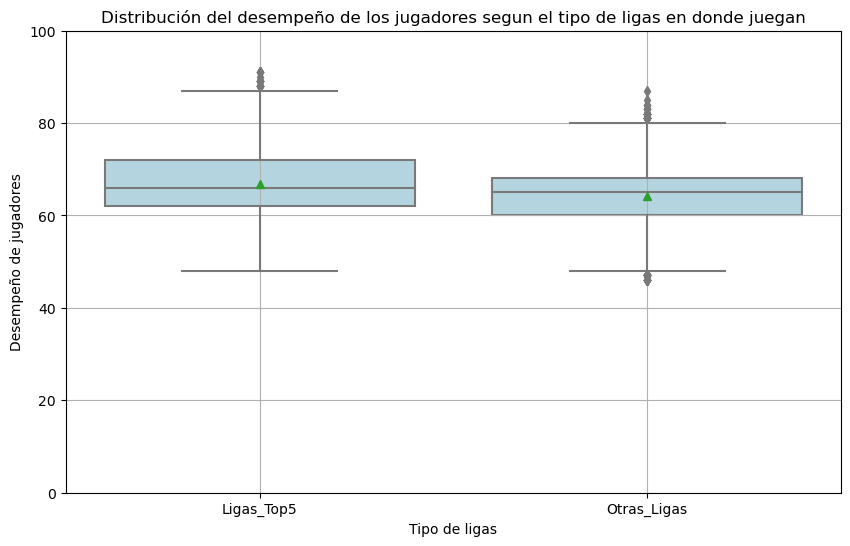

In [37]:
plt.figure(figsize=(10,6)) 
boxplot_pf_overal=sns.boxplot(x=base_datos['ligas'],y=base_datos['overall'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_pf_overal.set_xlabel('Tipo de ligas') ## cambia el título del eje x
boxplot_pf_overal.set_ylabel('Desempeño de jugadores') ## cambia el título del eje x
boxplot_pf_overal.set_ylim(0, 100)                     ## cambia los límites del eje y
# boxplot_pf_overal.set_yticks(range(0,22,2))               ## cambia los valores del eje x
boxplot_pf_overal.set_title('Distribución del desempeño de los jugadores segun el tipo de ligas en donde juegan')
plt.grid()
plt.show()  

**Conclusión:** De la tabla ligas_overall obtenida podemos observar los parametros de medida del promedio de desempeño que presentan los jugadores de segun la división establecida, estableciendo como resultados las siguientes medias: 
LigasTop5 = 66.84 vs OtrasLigas = 64.27
De igual forma, en la visualización presentada en los digramas de caja, podemos comparar el comportamiento de la distribución de los datos y sus coeficientes para un mayor entendimiento.

Para dar respuesta  a la pregunta 6, procederemos a realizar las filtraciones requeridas y las guardaremos en nuevos DF

In [38]:

# Filtramos las posiciones requeridas para el analisis
cm_cam = base_datos[(base_datos['position'] == 'CM') | (base_datos['position'] == 'CAM')]
cm_cam




,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,...,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall,positions_g,club_continent,GruposEstatura,ligas
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.50,...,High,Medium,Unique,England,Manchester City,85,Mediocampista,Europa,Menor a 185,Ligas_Top5
17,218667,Bernardo Mota Veiga de Carvalho e Silva,27,Portugal,173,141,CAM,88,88,97.50,...,High,High,Lean (170-185),England,Manchester City,85,Mediocampista,Europa,Menor a 185,Ligas_Top5
23,182521,Toni Kroos,32,Germany,183,168,CM,88,88,72.00,...,Medium,Medium,Normal (170-185),Spain,Real Madrid,85,Mediocampista,Europa,Menor a 185,Ligas_Top5
24,177003,Luka ModriÄ‡,36,Croatia,172,146,CM,88,88,29.00,...,Medium,Medium,Lean (170-185),Spain,Real Madrid,85,Mediocampista,Europa,Menor a 185,Ligas_Top5
26,228702,Frenkie de Jong,25,Netherlands,180,163,CM,87,92,116.50,...,High,Medium,Unique,Spain,Fc Barcelona,83,Mediocampista,Europa,Menor a 185,Ligas_Top5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22056,256411,Orrin McLaughlin,19,Northern Ireland,170,150,CM,49,63,0.11,...,Medium,Medium,Normal (170-),Northern Ireland,Derry City,61,Mediocampista,Europa,Menor a 185,Otras_Ligas
22062,265463,Danstan Randall Fernandes,21,India,178,154,CAM,49,60,0.11,...,Medium,Medium,Lean (170-185),India,Goa,59,Mediocampista,Asia,Menor a 185,Otras_Ligas
22063,260393,Tomas Giraldo,19,Canada,182,161,CM,48,64,0.12,...,Medium,Medium,Normal (170-185),Canada,Cf MontrÃ©al,69,Mediocampista,Norte America,Menor a 185,Otras_Ligas
22072,265566,Subhadip Majhi,23,India,175,154,CM,47,55,0.10,...,Medium,Medium,Normal (170-185),India,Chennaiyin,59,Mediocampista,Asia,Menor a 185,Otras_Ligas


Se quiere saber cual posicion en el mediocampo(variable cualitativa) tiene una mayor proporcion de jugadores con su pie dominante izquierdo(variable cualitativa)


In [39]:
# Analizamos la distribución de jugadores en las posiciones requeridas

tabla_position_pie = tabla_freq(cm_cam['position'])
tabla_position_pie

col_0,position,Frec. Abs.,Frec. Rel.
0,CAM,1267,0.328494
1,CM,2590,0.671506


In [40]:
# Observamos la distribución de los jugadores segun su posición y su pie dominante
pd.crosstab(index=cm_cam['position'],columns=cm_cam['pref_foot'],margins=True).reset_index()

pref_foot,position,Left,Right,All
0,CAM,353,914,1267
1,CM,481,2109,2590
2,All,834,3023,3857


In [41]:
tabla_posicion_foot = pd.crosstab(index=cm_cam['position'],columns=cm_cam['pref_foot'],normalize='index').reset_index()
tabla_posicion_foot 

pref_foot,position,Left,Right
0,CAM,0.278611,0.721389
1,CM,0.185714,0.814286


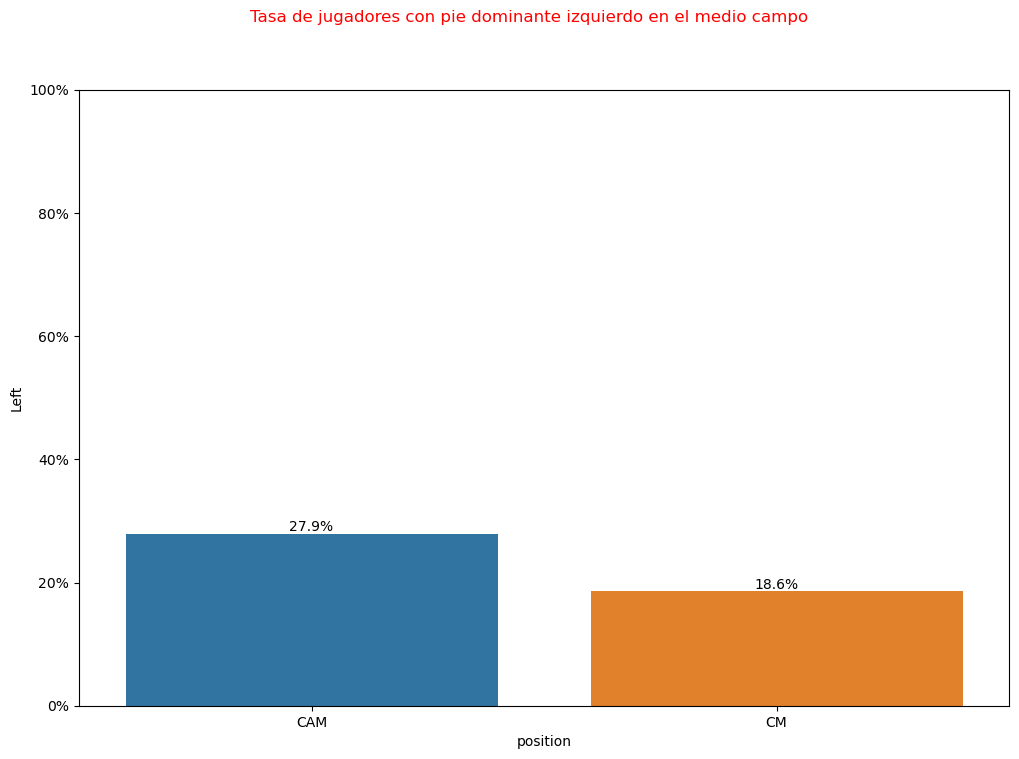

In [42]:
plt.figure(figsize=(12,8)) 

# Titulo general
plt.suptitle('Tasa de jugadores con pie dominante izquierdo en el medio campo', color='r')

# Primer subgrafico
frec_ca_cam=sns.barplot(x=tabla_posicion_foot['position'],y=tabla_posicion_foot["Left"]*100)
frec_ca_cam.bar_label(frec_ca_cam.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
frec_ca_cam.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_ca_cam.set(ylim=(0, 100))
plt.show()

**Conclusión:** La afirmación realizada por el scout es incorrecta, en la tabla suministrada y el grafico visualizado se aprecia a los jugadores que juegan en la posición CAM con una mayor proporción en comparación con los jugadores en posición CM.
(27.9% vs 18.6%, respectivamente)

Para responder la pregunta 7, se requiere analizar la relacion entre dos variables cuantitativas. En primer instancia se procede a realizar el calculo de correlacion del coeficiente de Pearson:

In [43]:
#Calculamos el coeficiente de correlacion entre las dos variables cuantitativas a explorar
correlacion =  base_datos['overall'].corr(base_datos['club_overall'])

# Para una visualizacion mas tecnica, se entregan los datos en una tabal.
tabla_correlacion = pd.DataFrame({'Variable 1': 'overall',
                                  'Variable 2': 'club_overall',
                                  'Coeficiente de correlación': [correlacion]})
tabla_correlacion

,Variable 1,Variable 2,Coeficiente de correlación
0,overall,club_overall,0.581029


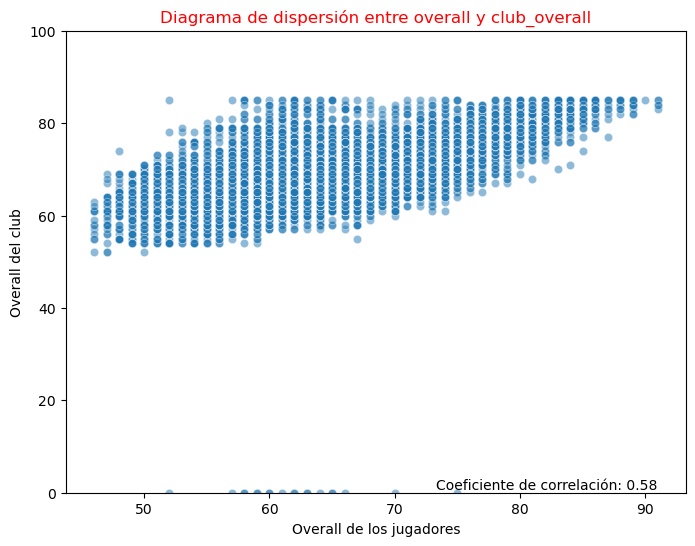

In [44]:
plt.figure(figsize=(8, 6))
scatter_overalls = sns.scatterplot(data=base_datos, x='overall', y='club_overall', alpha=0.5) #

# Realizamos el grafico de dispersion en relación de las dos variables a explorar
scatter_overalls.set_xlabel('Overall de los jugadores') 
scatter_overalls.set_ylabel('Overall del club') 
scatter_overalls.set(ylim=(0, 100)) # limites eje y
scatter_overalls.set_title('Diagrama de dispersión entre overall y club_overall', color= 'r')

# para mostrar el coeficiente de Pearson en la grafica

scatter_overalls.text(base_datos['overall'].max(), base_datos['club_overall'].min(), f'Coeficiente de correlación: {correlacion:.2f}', ha='right', va='bottom')
plt.show()


**Conclusión:** Es correcto afirmar que existe una correlación entre el desempeño de los jugadores y el puntaje de desempeño de los clubs. 
El coeficiente de correlación de Pearson para este caso es de 0.58 el cual esta dentro del rango de una correlación positiva moderada, al igual que, se logra apreciar la correlación de los datos en el diagrama de dispersión entregado.